In [7]:
#Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

LOAD DATA

In [2]:
# Training
x_trainning_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\X_training.csv')
y_trainning_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\y_training.csv')

# Validation
x_validation_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\X_validation.csv')
y_validation_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\y_validation.csv')

# Test
x_test_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\X_test.csv')
y_test_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\y_test.csv')


In [3]:
#Features selection
#Coisas similares estão próximas uma das outras, portanto, todas as suas características precisam ser númericas. (discard the ID and all binary features)

#selected features 
#features = ['age', 'class', 'flight_distance', 'inflight_wifi_service',
#            'departure_arrival_time_convenient', 'ease_of_online_booking',
#           'gate_location', 'food_and_drink', 'online_boarding', 
#            'seat_comfort', 'inflight_entertainment',
#            'on_board_service', 'leg_room_service', 
#           'departure_delay_in_minutes', 'arrival_delay_in_minutes']


features = ['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']


#x_trainning = x_trainning_data.loc[:,features]
#x_test = x_test_data.loc[:,features]
#x_validation = x_trainning_data.loc[:,features]

y_trainning = y_trainning_data.iloc[:, 0]
y_test   = y_test_data.iloc[:, 0]
y_validation  = y_validation_data.iloc[:, 0]


Classification - Trainning

In [4]:
# Define and Fit Model
Regression = LogisticRegression(random_state=42)

Regression.fit(x_trainning_data, y_trainning)

# Predict
y_pred_train = Regression.predict(x_trainning_data)

In [8]:
#Performance's analysis
# Confusion Matrix 
confusion_matrix = mt.confusion_matrix( y_trainning, y_pred_train) 
print(f"confusion matrix is:")
print(confusion_matrix)

#accuracy
accuracy = mt.accuracy_score(y_trainning, y_pred_train)
print(f"accuracy is: {accuracy}")

#Precisão é o número de acertos a cada tentativa
#Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
#precision
precision= mt.precision_score( y_trainning, y_pred_train) 
print(f"precision is: {precision}")

#Recall
recall= mt.recall_score( y_trainning, y_pred_train) 
print(f"recall is: {recall}")

#F1_Score (um unico número que representa precision e recall)
f1_score = mt.f1_score(y_trainning, y_pred_train)
print(f"f1_score is: {f1_score}")

confusion matrix is:
[[41087     0]
 [31428     0]]
accuracy is: 0.5666000137902503
precision is: 0.0
recall is: 0.0
f1_score is: 0.0


Classification - Validation

In [12]:
#Define and Fit model
Regression = LogisticRegression(random_state=42)

Regression.fit(x_trainning_data,y_trainning)

# Predict
y_pred_validation = Regression.predict(x_validation_data)

In [13]:
#Performance's analysis
# Confusion Matrix 
confusion_matrix = mt.confusion_matrix( y_validation, y_pred_validation) 
print(f"confusion matrix is:")
print(confusion_matrix)

#accuracy
accuracy = mt.accuracy_score(y_validation, y_pred_validation)
print(f"accuracy is: {accuracy}")

#Precisão é o número de acertos a cada tentativa
#Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
#precision
precision= mt.precision_score( y_validation, y_pred_validation) 
print(f"precision is: {precision}")

#Recall
recall= mt.recall_score( y_validation, y_pred_validation) 
print(f"recall is: {recall}")

#F1_Score (um unico número que representa precision e recall)
f1_score = mt.f1_score(y_validation, y_pred_validation)
print(f"f1_score is: {f1_score}")

confusion matrix is:
[[17610     0]
 [13469     0]]
accuracy is: 0.5666205476366678
precision is: 0.0
recall is: 0.0
f1_score is: 0.0


Hyperparameters Fine Tunning

In [34]:
C_values = [i / 9.0 for i in range(10, 60)]  # Intervalo de valores de C como floats de 1.1 a 6.6
best_C = 0
best_F1 = 0
best_Precision = 0
best_Recall = 0
f1_list = []
accuracy_list = []
precision_list = []
recall_list = []

for i in C_values:
    Regression = LogisticRegression(C=i, solver='saga', max_iter=100)
    Regression.fit(x_trainning_data, y_trainning)
    y_pred_fine_tuning = Regression.predict(x_validation_data)
    
    # Calculando as métricas de desempenho
    accuracy = mt.accuracy_score(y_validation, y_pred_fine_tuning)
    precision = mt.precision_score(y_validation, y_pred_fine_tuning)
    recall = mt.recall_score(y_validation, y_pred_fine_tuning)
    f1_score = mt.f1_score(y_validation, y_pred_fine_tuning)
    
    # Armazenando as métricas nas listas
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1_score)
    
    # Atualizando as melhores métricas encontradas
    if recall > best_Recall:
        best_Recall = recall

    if precision > best_Precision:
        best_Precision = precision

    if f1_score > best_F1:
        best_F1 = f1_score
        best_C = i
        best_model = Regression

# Exibindo os melhores resultados encontrados
print(f"BEST C: {best_C}")


BEST C: 1.1111111111111112
BEST F1: 0.0031124944419742106


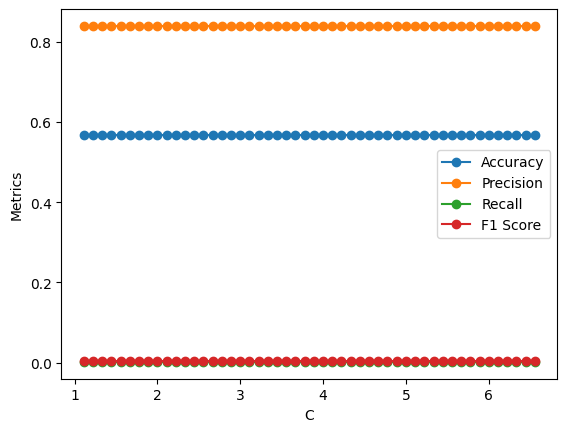

In [35]:
# Plot results
plt.plot(C, accuracy_list, marker="o", label="Accuracy")
plt.plot(C, precision_list, marker="o", label="Precision")
plt.plot(C, recall_list, marker="o", label="Recall")
plt.plot(C, f1_list, marker="o", label="F1 Score")
plt.xlabel("C")
plt.ylabel("Metrics")
plt.legend()
#plt.hlines( 0.95, 0, 1, color='b', linestyle='--' )
#plt.hlines( 0.68, 0, 1, color='g', linestyle='--' )

Classification - Test

In [37]:
Regression = LogisticRegression(C=best_C)

#Fit model
Regression= Regression.fit(x_trainning_data,y_trainning)

y_pred_test = Regression.predict(x_test_data)

In [38]:
#Performance's analysis
# Confusion Matrix 
confusion_matrix = mt.confusion_matrix( y_test, y_pred_test) 
print(f"confusion matrix is:")
print(confusion_matrix)

#accuracy
accuracy = mt.accuracy_score(y_test, y_pred_test)
print(f"accuracy is: {accuracy}")

#Precisão é o número de acertos a cada tentativa
#Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
#precision
precision= mt.precision_score( y_test, y_pred_test) 
print(f"precision is: {precision}")

#Recall
recall= mt.recall_score( y_test, y_pred_test) 
print(f"recall is: {recall}")

#F1_Score (um unico número que representa precision e recall)
f1_score = mt.f1_score(y_test, y_pred_test)
print(f"f1_score is: {f1_score}")

confusion matrix is:
[[14528     0]
 [11365     0]]
accuracy is: 0.561078283706021
precision is: 0.0
recall is: 0.0
f1_score is: 0.0
